In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [257]:
titanic_data=pd.read_csv('train.csv')

In [258]:
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [259]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [260]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


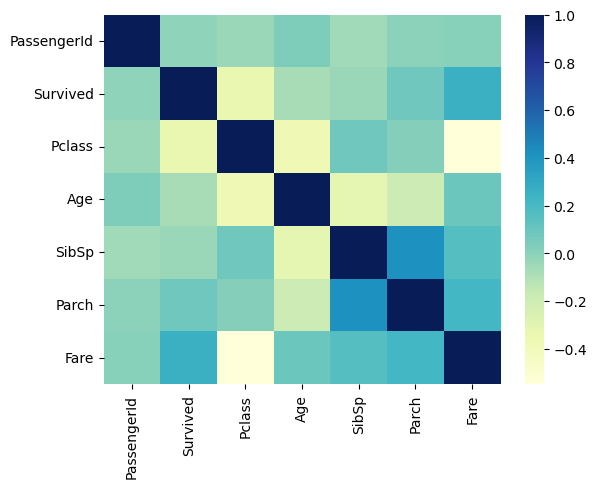

In [261]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

In [262]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set=titanic_data.loc[train_indices]
    strat_test_set=titanic_data.loc[test_indices]

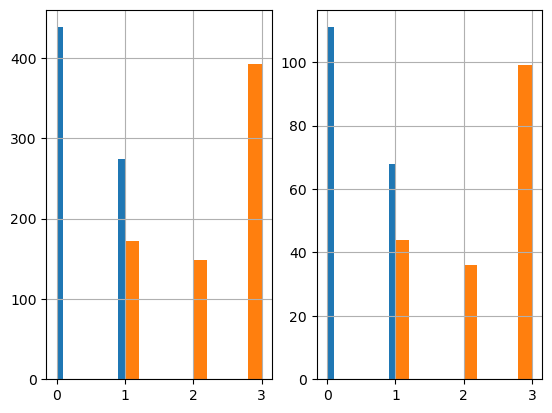

In [263]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [264]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 652 to 154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          583 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [265]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [266]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # One-Hot Encoding for 'Embarked' column
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        # One-Hot Encoding for 'Sex' column
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        return X


In [267]:
class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        X=X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")
        return X
    

In [268]:
from sklearn.pipeline import Pipeline

pipeline=Pipeline([("ageimputer",AgeImputer()),
                  ("featureencoder",FeatureEncoder()),
                  ("featuredcropper",FeatureDropper())])

In [269]:
strat_train_set = pipeline.fit_transform(strat_train_set)


In [270]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
652,653,0,3,21.00000,0,0,8.4333,0.0,0.0,1.0,0.0,1.0
130,131,0,3,33.00000,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
524,525,0,3,29.70283,0,0,7.2292,1.0,0.0,0.0,0.0,1.0
684,685,0,2,60.00000,1,1,39.0000,0.0,0.0,1.0,0.0,1.0
233,234,1,3,5.00000,4,2,31.3875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
325,326,1,1,36.00000,0,0,135.6333,1.0,0.0,0.0,1.0,0.0
195,196,1,1,58.00000,0,0,146.5208,1.0,0.0,0.0,1.0,0.0
52,53,1,1,49.00000,1,0,76.7292,1.0,0.0,0.0,1.0,0.0
411,412,0,3,29.70283,0,0,6.8583,0.0,1.0,0.0,0.0,1.0


In [271]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 652 to 154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [272]:
from sklearn.preprocessing import StandardScaler
X=strat_train_set.drop(['Survived'],axis=1)
y=strat_train_set['Survived']
scaler=StandardScaler()
X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [273]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid =[
    {
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)  



GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [274]:
final_clf = grid_search.best_estimator_


In [275]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=500)

In [276]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [277]:
X_test=strat_test_set.drop(['Survived'],axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [278]:
final_clf.score(X_data_test,y_data_test)

0.8268156424581006

In [279]:
final_data=pipeline.fit_transform(titanic_data)

In [280]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [281]:
X_final=final_data.drop(['Survived'],axis=1)
y_final=final_data['Survived']
scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [282]:
prod_clf = RandomForestClassifier()

param_grid = [{
    "n_estimators": [10, 100, 200, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 3, 4]
}]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)  

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [283]:
prod_final_clf=grid_search.best_estimator_

In [284]:
titanic_test_data=pd.read_csv("test.csv")

In [285]:
final_test_data=pipeline.fit_transform(titanic_test_data)

In [287]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")
scaler=StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [288]:
predictions=prod_final_clf.predict(X_data_final_test)

In [296]:
# Assuming predictions is a pandas DataFrame containing the predicted values
final_df = pd.DataFrame({
    'PassengerId': titanic_test_data['PassengerId'],
    'Survived': predictions
})

# Save to CSV file
final_df.to_csv("predictions.csv", index=False)


In [297]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
